# Derin Öğrenme ile Fiyat Tahmin Modeli: Volkswagen İkinci El Araç Piyasası Analizi

# Giriş

Bu proje, Birleşik Krallık ikinci el araç piyasasında yer alan Volkswagen marka araçların fiyatlarını etkileyen temel parametreleri analiz etmek ve bu verilerle yüksek doğruluklu fiyat tahminleri üretmek amacıyla geliştirilmiştir.

# Kütüphaneler ve Verinin Yüklenmesi

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [396]:
df = pd.read_csv("vw.csv")

# Veriye İlk Bakış

In [397]:
df.head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
5,T-Roc,2020,31895,Manual,10,Petrol,145,42.2,1.5
6,T-Roc,2020,27895,Manual,10,Petrol,145,42.2,1.5
7,T-Roc,2020,39495,Semi-Auto,10,Petrol,145,32.5,2.0
8,T-Roc,2019,21995,Manual,10,Petrol,145,44.1,1.0
9,T-Roc,2019,23285,Manual,10,Petrol,145,42.2,1.5


In [398]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [399]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


# Keşifsel Veri Analizi (EDA)

## Veri Temizliği

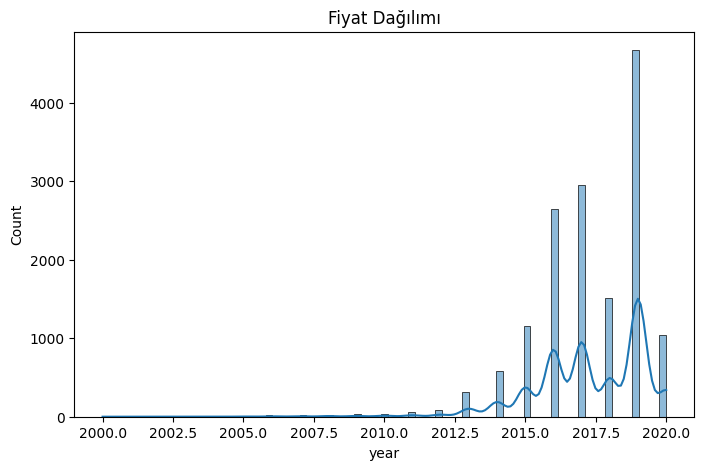

In [400]:
plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(df["year"], kde=True)
plt.title("Fiyat Dağılımı")
plt.show()

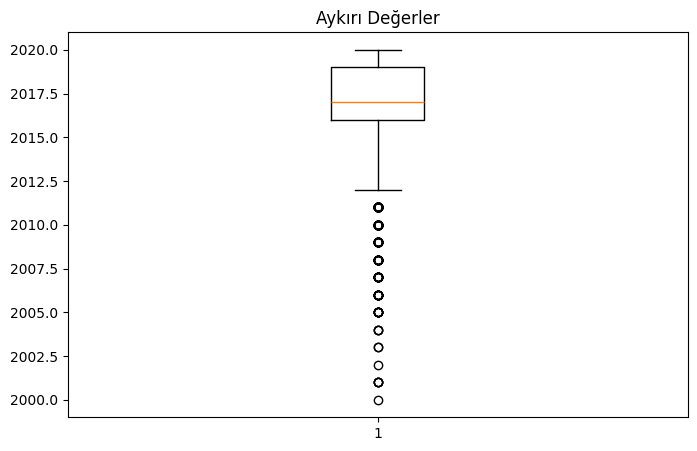

In [401]:
plt.figure(figsize=(8, 5), dpi=100)
plt.boxplot(df["year"])
plt.title("Aykırı Değerler")
plt.show()

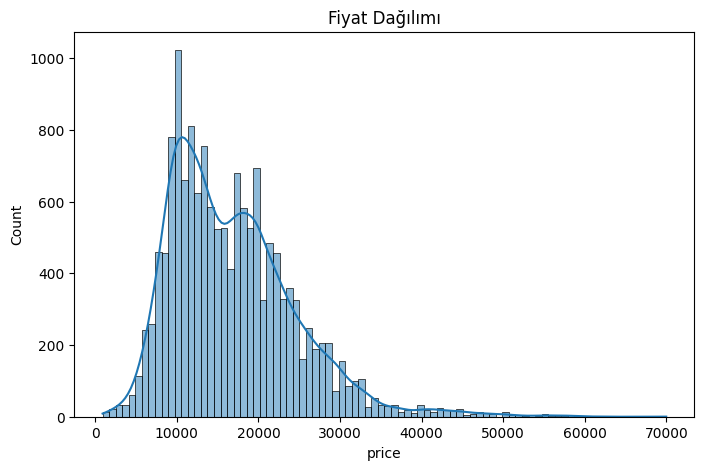

In [402]:
plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(df["price"], kde=True)
plt.title("Fiyat Dağılımı")
plt.show()

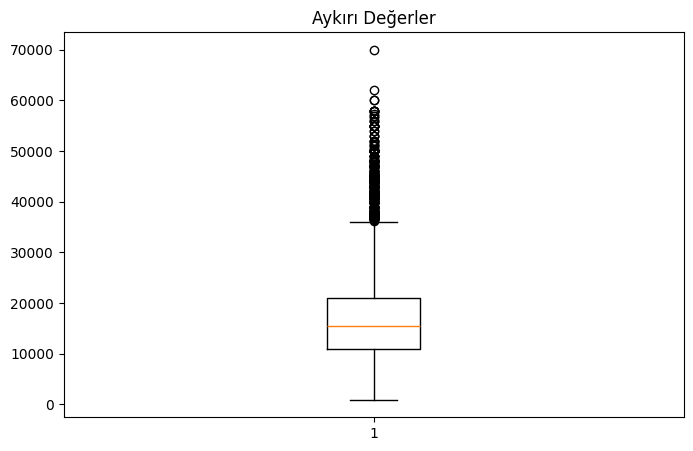

In [403]:
plt.figure(figsize=(8, 5), dpi=100)
plt.boxplot(df["price"])
plt.title("Aykırı Değerler")
plt.show()

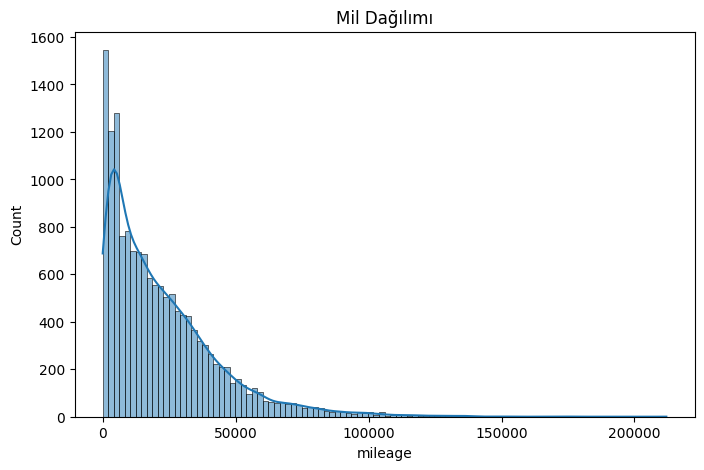

In [404]:
plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(df["mileage"], kde=True)
plt.title("Mil Dağılımı")
plt.show()

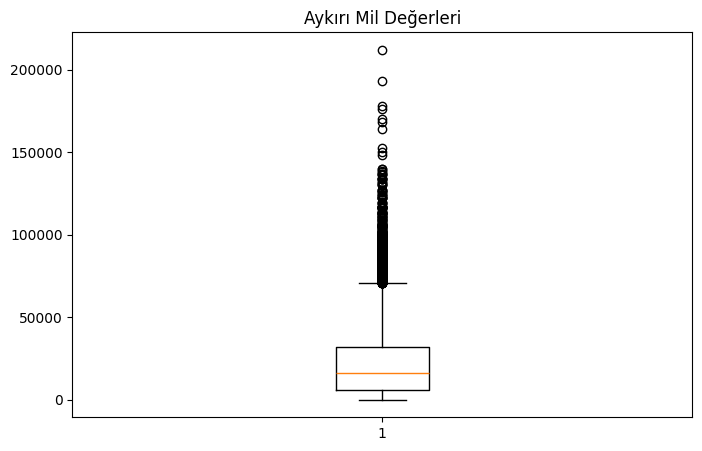

In [405]:
plt.figure(figsize=(8, 5), dpi=100)
plt.boxplot(df["mileage"])
plt.title("Aykırı Mil Değerleri")
plt.show()

In [406]:
df_clean = df[(df["year"] >= 2011) & (df["price"] < 35000) & (df["mileage"] < 90000)] # Aykırı değer (Outlier) temizliği
deletedCount = len(df) - len(df_clean)
print(f"{deletedCount} veri silindi.")

654 veri silindi.


Silinen toplam veri %4.34 (%5'in altında)

In [407]:
df = df_clean.copy()

## Veri Ön İşleme (Encoding)

In [408]:
# Kategorik sütunlar (model, transmission, fuelType) sayısal verilere dönüştürülüyor.
df_final = pd.get_dummies(df, columns=["model", "transmission", "fuelType"] )
df_final.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ CC', 'model_ Caddy',
       'model_ Caddy Life', 'model_ Caddy Maxi', 'model_ Caddy Maxi Life',
       'model_ Caravelle', 'model_ Eos', 'model_ Golf', 'model_ Golf SV',
       'model_ Jetta', 'model_ Passat', 'model_ Polo', 'model_ Scirocco',
       'model_ Sharan', 'model_ Shuttle', 'model_ T-Cross', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Touran', 'model_ Up', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')

In [409]:
df = df_final.copy()

## Korelasyon Analizi ve Bulgular

In [410]:
df.corr(numeric_only=True)["price"] #Sayısal verilerin fiyata göre korelasyonu

,price
year,0.643694
price,1.000000
mileage,-0.529462
tax,0.552138
mpg,-0.487149
engineSize,0.548917
model_ Amarok,0.107929
model_ Arteon,0.194977
model_ Beetle,-0.056700
model_ CC,-0.068627


* Year (0.64): Güçlü ve pozitif bir korelasyon mevcuttur. Araç yaşı azaldıkça piyasa değeri beklentilerle uyumlu olarak belirgin bir artış göstermektedir.

* EngineSize (0.54): Motor hacmi ile fiyat arasında pozitif yönlü bir ilişki saptanmıştır. Daha yüksek motor gücü ve hacmine sahip modellerin, üst segmentte konumlanması fiyat artışını desteklemektedir.

* Mileage (-0.52): Fiyat ile kat edilen mesafe arasında negatif yönlü orta şiddetli bir ilişki tespit edilmiştir. Markanın ikinci el piyasasındaki güçlü imajı, yüksek kilometrenin değer kaybı üzerindeki etkisini bir miktar sınırlamaktadır.

* MPG (-0.50): Yakıt verimliliği arttıkça fiyatın düştüğü gözlemlenmiştir. Bu durum, yüksek verimlilik sunan araçların genellikle ekonomik ve giriş seviyesi modellerden (Polo vb.) oluşmasıyla açıklanmaktadır.

In [411]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000
mean,2017.336206,16419.177412,20965.039647,111.271806,54.179411,1.572530
std,1.792325,6538.794739,18131.253092,61.937284,13.172355,0.434592
min,2011.000000,3495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10995.000000,6000.000000,30.000000,47.100000,1.200000
50%,2017.000000,15490.000000,16459.000000,145.000000,53.300000,1.500000
75%,2019.000000,20899.000000,31143.000000,145.000000,60.100000,2.000000
max,2020.000000,34999.000000,89924.000000,325.000000,188.300000,3.000000


# Model Oluşturma

In [412]:
y = df["price"].values # Hedef ve girdileri ayırma
x = df.drop("price", axis=1).values

In [413]:
x

array([[2019, 13904, 145, ..., False, False, False],
       [2019, 4562, 145, ..., False, False, False],
       [2019, 7414, 145, ..., False, False, False],
       ...,
       [2015, 41850, 125, ..., False, False, False],
       [2014, 58000, 125, ..., False, False, False],
       [2012, 74000, 125, ..., False, False, False]], dtype=object)

In [414]:
y

array([25000, 26883, 20000, ..., 12495,  8950,  5990])

## Eğitim ve Test Gruplarının Oluşturulması (Train-Test Split)

In [415]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [416]:
len(x_train)

10152

In [417]:
len(x_test)

4351

## Veri Ölçeklendirme (Scaling)


In [418]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [419]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [420]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [421]:
x_train.shape

(10152, 37)

In [422]:
model = Sequential()

model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(10,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse",metrics=["mae"])
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1, patience=25)

In [423]:
model.fit(x=x_train, y = y_train, validation_data=(x_test,y_test), batch_size=100,epochs=300, verbose=1, callbacks=[early_stop])

Epoch 1/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 314676736.0000 - mae: 16457.2422 - val_loss: 228151040.0000 - val_mae: 13654.9873
Epoch 2/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94769768.0000 - mae: 7719.8774 - val_loss: 20712070.0000 - val_mae: 3628.8064
Epoch 3/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18557820.0000 - mae: 3404.4175 - val_loss: 12127820.0000 - val_mae: 2595.4243
Epoch 4/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11160130.0000 - mae: 2494.3967 - val_loss: 8791660.0000 - val_mae: 2163.5366
Epoch 5/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8362235.5000 - mae: 2139.3169 - val_loss: 7198656.5000 - val_mae: 1987.9147
Epoch 6/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7002587.0000 - mae: 1983.3647 - val_loss: 6267808.0000 - val_mae: 1841.0618
Epoch 7/300
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6021721.0000 - mae: 1837.8925 - val_loss: 5660813.0000 - val_mae: 1755.7727
Epoch 8/300
102/102 ━━━━━━━━━━

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


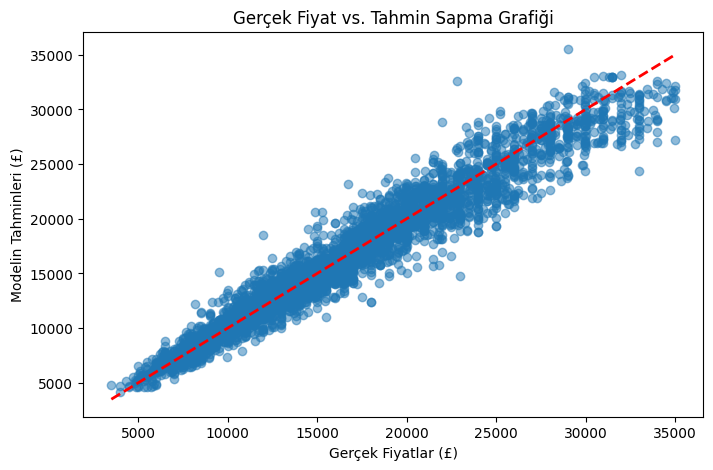

In [424]:

y_pred = model.predict(x_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5) # Gerçek fiyatlar vs Tahminler
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()] , "r--", lw=2)
plt.xlabel('Gerçek Fiyatlar (£)')
plt.ylabel('Modelin Tahminleri (£)')
plt.title('Gerçek Fiyat vs. Tahmin Sapma Grafiği')
plt.show()

In [425]:
lossData = pd.DataFrame(model.history.history)

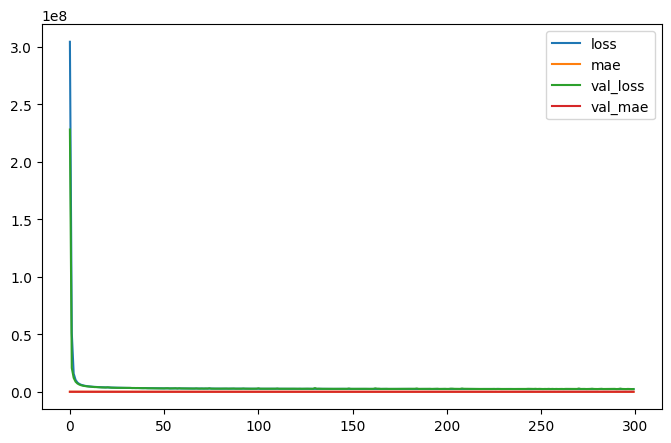

In [426]:
lossData.plot(figsize=(8, 5))
plt.show()

In [427]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

predictArray = model.predict(x_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


## Hata Analizi

In [428]:
predictArray

array([[24276.562],
       [14221.439],
       [ 9769.331],
       ...,
       [10618.545],
       [13613.945],
       [12976.941]], dtype=float32)

In [429]:
mean_absolute_error(y_test,predictArray)

1120.593505859375

In [430]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Modelin Ortalama Yüzdesel Hatası: %{mape * 100:.2f}")

Modelin Ortalama Yüzdesel Hatası: %6.90


In [431]:
#İlk 10 verideki Hata Payı:
y_pred = model.predict(x_test)

test_result = pd.DataFrame(y_test, columns=['Gerçek Fiyat'])
test_result['Tahmin Edilen'] = y_pred
test_result['Fark (Sapma)'] = test_result['Gerçek Fiyat'] - test_result['Tahmin Edilen']
test_result['Hata Payı %'] = (abs(test_result['Fark (Sapma)']) / test_result['Gerçek Fiyat']) * 100

print(test_result.head(10))

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Gerçek Fiyat  Tahmin Edilen  Fark (Sapma)  Hata Payı %
0         23990   24276.562500   -286.562500     1.194508
1         16650   14221.439453   2428.560547    14.585949
2          9890    9769.331055    120.668945     1.220111
3         28995   27825.314453   1169.685547     4.034094
4         19590   22270.095703  -2680.095703    13.680938
5         13995   12061.552734   1933.447266    13.815272
6          7250    7715.852539   -465.852539     6.425552
7         16490   14163.174805   2326.825195    14.110523
8         11012   11790.680664   -778.680664     7.071201
9          8440    8997.155273   -557.155273     6.601366


In [432]:
#En Hatalı Tahminler
highest_deviations = test_result.sort_values(by='Hata Payı %', ascending=False).head(10)
print("Modelin en çok yanıldığı araçlar:")
print(highest_deviations)

Modelin en çok yanıldığı araçlar:
      Gerçek Fiyat  Tahmin Edilen  Fark (Sapma)  Hata Payı %
1980          9500   15118.255859  -5618.255859    59.139535
3693         11995   18561.281250  -6566.281250    54.741820
3614          8199   12163.098633  -3964.098633    48.348562
2094         22788   32639.572266  -9851.572266    43.231404
3463         14900   20643.736328  -5743.736328    38.548566
2150         16750   23169.558594  -6419.558594    38.325723
3502          3495    4792.276367  -1297.276367    37.118065
4316          6490    8853.992188  -2363.992188    36.425149
2764         23000   14755.701172   8244.298828    35.844778
4011          9120   12361.857422  -3241.857422    35.546682


In [433]:
df.iloc[highest_deviations.index]

,year,price,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
2006,2019,17498,4821,145,47.1,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3723,2018,13626,13737,145,49.6,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3643,2017,19490,17913,150,44.1,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2120,2016,15480,16059,20,60.1,1.4,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3491,2020,26490,1000,145,44.1,1.5,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2176,2014,9020,52294,30,53.3,1.4,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3530,2018,19750,9500,145,55.4,1.5,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4351,2019,12999,9029,145,49.6,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2790,2019,28725,5737,145,32.8,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4043,2016,13495,32000,0,65.7,1.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [434]:
x_test_df = pd.DataFrame(x_test, columns=df.drop("price", axis=1).columns)
year_index = list(df.drop("price", axis=1).columns).index("year")
x_test_df["year"] = scaler.inverse_transform(x_test)[:, year_index]

year_mae = []

for year in sorted(x_test_df["year"].unique()):
    mask = x_test_df["year"] == year
    if mask.sum() > 10:
        mae = mean_absolute_error(y_test[mask], y_pred[mask])
        year_mae.append((year, mae))

pd.DataFrame(year_mae, columns=["year", "mae"])

,year,mae
0,2011.0,872.638306
1,2012.0,819.308655
2,2013.0,804.113892
3,2014.0,847.809021
4,2015.0,838.284607
5,2016.0,817.922607
6,2017.0,950.206726
7,2018.0,1206.135132
8,2019.0,1432.008667
9,2020.0,1497.984619


In [435]:
#2018 Öncesi ve sonrası MAE değerleri
x_test_df = pd.DataFrame(x_test, columns=df.drop("price", axis=1).columns)

year_index = list(df.drop("price", axis=1).columns).index("year")
x_test_df["year"] = scaler.inverse_transform(x_test)[:, year_index]

new_mask = x_test_df["year"] >= 2018

mae_new = mean_absolute_error(y_test[new_mask], y_pred[new_mask])
mae_old = mean_absolute_error(y_test[~new_mask], y_pred[~new_mask])

print("2018+ MAE:", mae_new)
print("2018 öncesi MAE:", mae_old)

2018+ MAE: 1392.88671875
2018 öncesi MAE: 874.6244506835938


#Model Performans Analizi ve Kısıtlar

En yüksek hataya sahip tahminler incelendiğinde bu gözlemlerin ortak özelliğinin üretim yılı açısından nispeten yeni araçlar olduğu görülmüştür. Bu bulgudan hareketle yıl bazlı MAE değerleri analiz edilmiştir.

2011–2017 aralığında hata değerlerinin global MAE (≈ £1120) ile karşılaştırıldığında görece stabil seyrettiği gözlemlenmiştir. Ancak 2018 yılı itibarıyla hata değerlerinde belirgin bir artış ortaya çıkmaktadır.


Segment bazlı sonuçlar:

2018 öncesi MAE: £874

2018 ve sonrası MAE: £1392


Ayrıca yıl bazlı detay incelendiğinde 2018, 2019 ve 2020 modellerde MAE değerlerinin sırasıyla £1206, £1432 ve £1497 seviyelerine yükseldiği görülmektedir. Bu durum modelin özellikle 2018 ve sonrası üretilen araçların fiyat dinamiklerini yakalamakta zorlandığını göstermektedir.

Bu artışın olası nedenleri şunlar olabilir:

* Yeni araçlarda fiyat varyansının daha yüksek olması

* Donanım, motor tipi ve teknoloji farklılıklarının modele sınırlı düzeyde yansıtılması

* Araç değer kaybı eğrisinin doğrusal olmaması

* 2018 sonrası segmentte ortalama fiyat seviyesinin daha yüksek olması

* Yeni araç fiyatlarının garanti süresi, güncel piyasa koşulları ve model yılına özgü talep dinamiklerine daha duyarlı olabilmesi

Bu nedenle veri seti 2018 öncesi ve sonrası olarak iki segmente ayrılarak değerlendirilmiştir.

# Özet ve Sonuç


**Model:** 7 gizli katmanlı ve 1 çıkış katmanlı, toplam 8 katmanlı bir derin sinir ağı (DNN)

**Başarı Oranı:** %93.1 (MAPE: %6.90).

**Gözlem:** Model, 2011-2017 yılları arasında üretilmiş araçlarda oldukça stabil sonuçlar verirken, 2018 ve sonrasında üretilmiş araçlarda daha yüksek sapma göstermektedir.